In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Global variables

In [2]:
ARGS = {
    "wt-madrid": "dataset/extract/wt_madrid.h5",
    "aq-madrid": "dataset/extract/aq_madrid.h5",
}

## Functions

In [3]:
# Function for dataframe describe
def describe_data(df: pd.DataFrame) -> pd.DataFrame:
    """This function describe the datas of a dataframe. Returning the max,
    min, mean, median, quantile, variance, standard deviation,
    mean absolute deviation, amplitude, root mean squared, kurtosis, skewness
    and count for all headers in dataframe

    Parameters
    ----------
    df : pd.DataFrame
        Dataframe of input

    Returns
    -------
    pd.DataFrame
        Dataframe with the descriptions
    """

    FIRST_QUARTILE = 0.25
    THIRD_QUARTILE = 0.75
    IQR_CONSTANT = 1.5

    def _apply(header: str, column: []):
        _max = column.max()
        _min = column.min()

        # Scatter
        _q1 = column.quantile(FIRST_QUARTILE)
        _q3 = column.quantile(THIRD_QUARTILE)
        _iqr = _q3 - _q1
        _lower = max(_min, _q1 - (IQR_CONSTANT * _iqr))
        _upper = min(_max, _q3 + (IQR_CONSTANT * _iqr))

        return {
            "header": header,
            "max": _max,
            "min": _min,
            "mean": column.mean(),
            "median": column.median(),
            "lower limit": _lower,
            "1-quartile": _q1,
            "3-quartile": _q3,
            "upper limit": _upper,
            "var": column.var(),
            "std": column.std(),
            "mad": column.mad(),
            "amp": _max - _min,
            "rms": (column.pow(2)).mean() ** 0.5,
            "kurtosis": column.kurtosis(),
            "skew": column.skew(),
            "count": column.count(),
            "nans": column.isna().sum(),
        }

    return pd.DataFrame(
        [_apply(_, df.loc[:, _]) for _ in df.columns]
    ).set_index("header")

In [4]:
# Function for plot heatmap
def corrplot(df):
    corr = df.corr('pearson', 1)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        _, ax1 = plt.subplots(1, 1, figsize=(15, 5))
        ax = sns.heatmap(
            corr,
            mask=mask,
            vmin=-1,
            vmax=1,
            annot=True,
            cmap='coolwarm',
            square=True,
            linewidths=.5,
            ax=ax1,
        )

## Datasets

### Weather Madrid 1997 - 2015

Weather data Barajas Airport, Madrid, between 1997 and 2015. Gathered web https://www.wunderground.com/ The Weather Company, LLC

Fields:
- Max TemperatureC
- Mean TemperatureC
- Min TemperatureC
- Dew PointC
- MeanDew PointC
- Min DewpointC
- Max Humidity
- Mean Humidity
- Min Humidity
- Max Sea Level PressurehPa
- Mean Sea Level PressurehPa
- Min Sea Level PressurehPa
- Max VisibilityKm
- Mean VisibilityKm
- Min VisibilitykM
- Max Wind SpeedKm/h
- Mean Wind SpeedKm/h
- Max Gust SpeedKm/h
- Precipitationmm
- CloudCover
- Events
- WindDirDegrees

In [5]:
# Load wt-madrid and show your keys
df_wt = pd.HDFStore(ARGS.get("wt-madrid"))
df_wt.keys()

['/master']

#### Preprocessing

In [6]:
LOWER_LIMIT_DATE = "2001"

weather = df_wt.get("master")
weather = weather.set_index("CET")
weather = weather.sort_values("CET")
weather.index = pd.to_datetime(weather.index)
weather = weather[weather.index >= LOWER_LIMIT_DATE]

#### Show datas

In [7]:
weather

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2001-01-01,10.0,7.0,4.0,9.0,6.0,3.0,100.0,89.0,81.0,1017,...,10.0,9.0,3.0,26,11,NaN,0.0,6.0,Rain,204
2001-01-10,10.0,7.0,3.0,9.0,6.0,3.0,100.0,98.0,87.0,1017,...,10.0,5.0,3.0,21,5,NaN,0.0,6.0,Rain,337
2001-01-11,11.0,8.0,5.0,9.0,7.0,5.0,100.0,90.0,76.0,1013,...,10.0,9.0,6.0,27,16,NaN,0.0,6.0,Rain,170
2001-01-12,9.0,7.0,6.0,7.0,6.0,4.0,100.0,93.0,81.0,1013,...,10.0,9.0,5.0,16,6,NaN,0.0,5.0,Rain,14
2001-01-13,12.0,6.0,1.0,5.0,3.0,0.0,100.0,78.0,58.0,1020,...,10.0,10.0,10.0,16,8,NaN,0.0,4.0,NaN,348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-05,27.0,20.0,12.0,10.0,7.0,3.0,67.0,42.0,14.0,1021,...,31.0,18.0,10.0,16,11,37.0,0.0,1.0,NaN,7
2015-09-06,28.0,21.0,15.0,11.0,8.0,5.0,63.0,40.0,16.0,1023,...,31.0,19.0,10.0,13,6,NaN,0.0,1.0,NaN,358
2015-09-07,27.0,21.0,16.0,13.0,9.0,3.0,68.0,46.0,15.0,1022,...,31.0,19.0,10.0,23,10,35.0,0.0,1.0,NaN,108


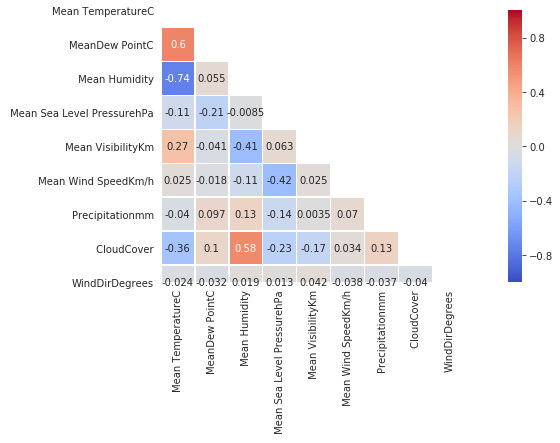

In [8]:
corrplot(weather[[
    'Mean TemperatureC',
    'MeanDew PointC',
    ' Mean Humidity',
    ' Mean Sea Level PressurehPa',
    ' Mean VisibilityKm',
    ' Mean Wind SpeedKm/h',
    'Precipitationmm',
    ' CloudCover',
    ' Events',
    'WindDirDegrees'
]])

---

### Air Quality in Madrid (2001-2018)

Includes daily and hourly historical air quality data of the levels registered from 2001 to 2018 and the list of stations being used for pollution and other particles analysis in the city.

Fields:
- SO_2: sulphur dioxide level measured in μg/m³. High levels of sulphur dioxide can produce irritation in the skin and membranes, and worsen asthma or heart diseases in sensitive groups.
- CO: carbon monoxide level measured in mg/m³. Carbon monoxide poisoning involves headaches, dizziness and confusion in short exposures and can result in loss of consciousness, arrhythmias, seizures or even death in the long term.
- NO: nitric oxide level measured in μg/m³. This is a highly corrosive gas generated among others by motor vehicles and fuel burning processes.
- NO_2: nitrogen dioxide level measured in μg/m³. Long-term exposure is a cause of chronic lung diseases, and are harmful for the vegetation.
- PM25: particles smaller than 2.5 μm level measured in μg/m³. The size of these particles allow them to penetrate into the gas exchange regions of the lungs (alveolus) and even enter the arteries. Long-term exposure is proven to be related to low birth weight and high blood pressure in newborn babies.
- PM10: particles smaller than 10 μm. Even though the cannot penetrate the alveolus, they can still penetrate through the lungs and affect other organs. Long term exposure can result in lung cancer and cardiovascular complications
- NOx: nitrous oxides level measured in μg/m³. Affect the human respiratory system worsening asthma or other diseases, and are responsible of the yellowish-brown color of photochemical smog.
- O_3: ozone level measured in μg/m³. High levels can produce asthma, bronchytis or other chronic pulmonary diseases in sensitive groups or outdoor workers.
- TOL: toluene (methylbenzene) level measured in μg/m³. Long-term exposure to this substance (present in tobacco smkoke as well) can result in kidney complications or permanent brain damage.
- BEN: benzene level measured in μg/m³. Benzene is a eye and skin irritant, and long exposures may result in several types of cancer, leukaemia and anaemias. Benzene is considered a group 1 carcinogenic to humans by the IARC.
- EBE: ethylbenzene level measured in μg/m³. Long term exposure can cause hearing or kidney problems and the IARC has concluded that long-term exposure can produce cancer.
- MXY: m-xylene level measured in μg/m³. Xylenes can affect not only air but also water and soil, and a long exposure to high levels of xylenes can result in diseases affecting the liver, kidney and nervous system (especially memory and affected stimulus reaction).
- PXY: p-xylene level measured in μg/m³. See MXY for xylene exposure effects on health.
- OXY: o-xylene level measured in μg/m³. See MXY for xylene exposure effects on health.
- TCH: total hydrocarbons level measured in mg/m³. This group of substances can be responsible of different blood, immune system, liver, spleen, kidneys or lung diseases.
- CH4: methane level measured in mg/m³. This gas is an asphyxiant, which displaces the oxygen animals need to breath. Displaced oxygen can result in dizzinnes, weakness, nausea and loss of coordination.
- NMHC: non-methane hydrocarbons (volatile organic compounds) level measured in mg/m³. Long exposure to some of these substances can result in damage to the liver, kidney, and central nervous system. Some of them are suspected to cause cancer in humans.

In [9]:
# Load aq-madrid and show keys
df_aq = pd.HDFStore(ARGS.get("aq-madrid"))
df_aq.keys()

['/28079001',
 '/28079003',
 '/28079004',
 '/28079006',
 '/28079007',
 '/28079008',
 '/28079009',
 '/28079011',
 '/28079012',
 '/28079014',
 '/28079015',
 '/28079016',
 '/28079017',
 '/28079018',
 '/28079019',
 '/28079021',
 '/28079022',
 '/28079023',
 '/28079024',
 '/28079025',
 '/28079026',
 '/28079027',
 '/28079035',
 '/28079036',
 '/28079038',
 '/28079039',
 '/28079040',
 '/28079047',
 '/28079048',
 '/28079049',
 '/28079050',
 '/28079054',
 '/28079055',
 '/28079056',
 '/28079057',
 '/28079058',
 '/28079059',
 '/28079060',
 '/28079099',
 '/master']

#### Stations

In [10]:
stations = df_aq.get("master")
stations

,id,name,address,lon,lat,elevation
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604
5,28079018,Farolillo,Calle Farolillo - C/Ervigio,-3.731853,40.394781,630
6,28079024,Casa de Campo,Casa de Campo (Terminal del Teleférico),-3.747347,40.419356,642
7,28079027,Barajas Pueblo,"C/. Júpiter, 21 (Barajas)",-3.580031,40.476928,621
8,28079035,Pza. del Carmen,Plaza del Carmen esq. Tres Cruces.,-3.703172,40.419208,659
9,28079036,Moratalaz,Avd. Moratalaz esq. Camino de los Vinateros,-3.645306,40.407947,685


#### Preprocessing

##### Get values before LIMIT_DATE

In [11]:
# Get all stations values before of 2016
UPPER_LIMIT_DATE = "2016"
emissions_st = {}

try:
    for st in stations["id"]:
        aux = df_aq[str(st)]
        aux = aux.sort_values("date")
        emissions_st[st] = aux[aux.index < UPPER_LIMIT_DATE]
        emissions_st[st]["id"] = st
except Exception as e:
    print(f"[ERROR] {e}")
    df_aq.close()

/opt/anaconda/envs/analytics/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


##### Concat all emissions

In [12]:
emissions = pd.DataFrame()
for em_s in emissions_st:
    emissions = pd.concat([emissions, emissions_st[em_s]], sort=True)
emissions = emissions.reset_index()
emissions["date"] = pd.to_datetime(emissions["date"])
emissions

,date,BEN,CH4,CO,EBE,MXY,NMHC,NO,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,id
0,2001-01-01 01:00:00,NaN,NaN,1.05,NaN,NaN,NaN,NaN,50.240002,132.699997,NaN,5.98,19.650000,NaN,NaN,20.610001,NaN,NaN,28079004
1,2001-01-01 02:00:00,NaN,NaN,1.77,NaN,NaN,NaN,NaN,47.970001,155.699997,NaN,6.13,38.730000,NaN,NaN,22.860001,NaN,NaN,28079004
2,2001-01-01 03:00:00,NaN,NaN,2.43,NaN,NaN,NaN,NaN,43.849998,222.600006,NaN,6.11,38.490002,NaN,NaN,24.910000,NaN,NaN,28079004
3,2001-01-01 04:00:00,NaN,NaN,2.06,NaN,NaN,NaN,NaN,44.500000,227.300003,NaN,6.29,45.369999,NaN,NaN,22.400000,NaN,NaN,28079004
4,2001-01-01 05:00:00,NaN,NaN,1.66,NaN,NaN,NaN,NaN,47.740002,200.699997,NaN,6.51,34.590000,NaN,NaN,21.600000,NaN,NaN,28079004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173243,2015-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,9.0,54.000000,NaN,NaN,41.00,5.000000,NaN,NaN,NaN,NaN,NaN,28079060
2173244,2015-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,32.0,71.000000,NaN,NaN,24.00,28.000000,NaN,NaN,NaN,NaN,NaN,28079060
2173245,2015-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,17.0,61.000000,NaN,NaN,29.00,15.000000,NaN,NaN,NaN,NaN,NaN,28079060
2173246,2015-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,21.0,65.000000,NaN,NaN,25.00,11.000000,NaN,NaN,NaN,NaN,NaN,28079060


Concat stations with emissions

In [13]:
dfmaq = pd.merge(left=emissions, right=stations, how="left", left_on='id', right_on='id')
dfmaq

,date,BEN,CH4,CO,EBE,MXY,NMHC,NO,NO_2,NOx,...,PXY,SO_2,TCH,TOL,id,name,address,lon,lat,elevation
0,2001-01-01 01:00:00,NaN,NaN,1.05,NaN,NaN,NaN,NaN,50.240002,132.699997,...,NaN,20.610001,NaN,NaN,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
1,2001-01-01 02:00:00,NaN,NaN,1.77,NaN,NaN,NaN,NaN,47.970001,155.699997,...,NaN,22.860001,NaN,NaN,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
2,2001-01-01 03:00:00,NaN,NaN,2.43,NaN,NaN,NaN,NaN,43.849998,222.600006,...,NaN,24.910000,NaN,NaN,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
3,2001-01-01 04:00:00,NaN,NaN,2.06,NaN,NaN,NaN,NaN,44.500000,227.300003,...,NaN,22.400000,NaN,NaN,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
4,2001-01-01 05:00:00,NaN,NaN,1.66,NaN,NaN,NaN,NaN,47.740002,200.699997,...,NaN,21.600000,NaN,NaN,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173243,2015-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,9.0,54.000000,NaN,...,NaN,NaN,NaN,NaN,28079060,Tres Olivos,Plaza Tres Olivos,-3.689761,40.500589,715
2173244,2015-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,32.0,71.000000,NaN,...,NaN,NaN,NaN,NaN,28079060,Tres Olivos,Plaza Tres Olivos,-3.689761,40.500589,715
2173245,2015-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,17.0,61.000000,NaN,...,NaN,NaN,NaN,NaN,28079060,Tres Olivos,Plaza Tres Olivos,-3.689761,40.500589,715
2173246,2015-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,21.0,65.000000,NaN,...,NaN,NaN,NaN,NaN,28079060,Tres Olivos,Plaza Tres Olivos,-3.689761,40.500589,715


##### Show describe datas

In [14]:
# for em_s in emissions_st:
#     display(
#         f"Station: {em_s} {emissions_st[em_s].shape}",
#         describe_data(emissions_st[em_s])
#     )

##### Show chart

In [15]:
# # for em_s in emissions_st:
# emissions_st[28079008].plot(figsize=(20,10))
# plt.show()

##### Show correlation data

In [16]:
# corrplot(emissions_st[28079008])

### Concat air quality with weather

In [17]:
dfmaq["new_date"] = [d.date() for d in dfmaq["date"]]

In [18]:
dfmaq = dfmaq.set_index("new_date")
dfmaq

,date,BEN,CH4,CO,EBE,MXY,NMHC,NO,NO_2,NOx,...,PXY,SO_2,TCH,TOL,id,name,address,lon,lat,elevation
new_date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,2001-01-01 01:00:00,NaN,NaN,1.05,NaN,NaN,NaN,NaN,50.240002,132.699997,...,NaN,20.610001,NaN,NaN,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
2001-01-01,2001-01-01 02:00:00,NaN,NaN,1.77,NaN,NaN,NaN,NaN,47.970001,155.699997,...,NaN,22.860001,NaN,NaN,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
2001-01-01,2001-01-01 03:00:00,NaN,NaN,2.43,NaN,NaN,NaN,NaN,43.849998,222.600006,...,NaN,24.910000,NaN,NaN,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
2001-01-01,2001-01-01 04:00:00,NaN,NaN,2.06,NaN,NaN,NaN,NaN,44.500000,227.300003,...,NaN,22.400000,NaN,NaN,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
2001-01-01,2001-01-01 05:00:00,NaN,NaN,1.66,NaN,NaN,NaN,NaN,47.740002,200.699997,...,NaN,21.600000,NaN,NaN,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31,2015-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,9.0,54.000000,NaN,...,NaN,NaN,NaN,NaN,28079060,Tres Olivos,Plaza Tres Olivos,-3.689761,40.500589,715
2015-12-31,2015-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,32.0,71.000000,NaN,...,NaN,NaN,NaN,NaN,28079060,Tres Olivos,Plaza Tres Olivos,-3.689761,40.500589,715
2015-12-31,2015-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,17.0,61.000000,NaN,...,NaN,NaN,NaN,NaN,28079060,Tres Olivos,Plaza Tres Olivos,-3.689761,40.500589,715


In [19]:
weather

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
2001-01-01,10.0,7.0,4.0,9.0,6.0,3.0,100.0,89.0,81.0,1017,...,10.0,9.0,3.0,26,11,NaN,0.0,6.0,Rain,204
2001-01-10,10.0,7.0,3.0,9.0,6.0,3.0,100.0,98.0,87.0,1017,...,10.0,5.0,3.0,21,5,NaN,0.0,6.0,Rain,337
2001-01-11,11.0,8.0,5.0,9.0,7.0,5.0,100.0,90.0,76.0,1013,...,10.0,9.0,6.0,27,16,NaN,0.0,6.0,Rain,170
2001-01-12,9.0,7.0,6.0,7.0,6.0,4.0,100.0,93.0,81.0,1013,...,10.0,9.0,5.0,16,6,NaN,0.0,5.0,Rain,14
2001-01-13,12.0,6.0,1.0,5.0,3.0,0.0,100.0,78.0,58.0,1020,...,10.0,10.0,10.0,16,8,NaN,0.0,4.0,NaN,348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-05,27.0,20.0,12.0,10.0,7.0,3.0,67.0,42.0,14.0,1021,...,31.0,18.0,10.0,16,11,37.0,0.0,1.0,NaN,7
2015-09-06,28.0,21.0,15.0,11.0,8.0,5.0,63.0,40.0,16.0,1023,...,31.0,19.0,10.0,13,6,NaN,0.0,1.0,NaN,358
2015-09-07,27.0,21.0,16.0,13.0,9.0,3.0,68.0,46.0,15.0,1022,...,31.0,19.0,10.0,23,10,35.0,0.0,1.0,NaN,108


In [21]:
dfmaq.join(weather)

,date,BEN,CH4,CO,EBE,MXY,NMHC,NO,NO_2,NOx,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
2001-01-01,2001-01-01 01:00:00,NaN,NaN,1.05,NaN,NaN,NaN,NaN,50.240002,132.699997,...,10.0,9.0,3.0,26.0,11.0,NaN,0.00,6.0,Rain,204.0
2001-01-01,2001-01-01 02:00:00,NaN,NaN,1.77,NaN,NaN,NaN,NaN,47.970001,155.699997,...,10.0,9.0,3.0,26.0,11.0,NaN,0.00,6.0,Rain,204.0
2001-01-01,2001-01-01 03:00:00,NaN,NaN,2.43,NaN,NaN,NaN,NaN,43.849998,222.600006,...,10.0,9.0,3.0,26.0,11.0,NaN,0.00,6.0,Rain,204.0
2001-01-01,2001-01-01 04:00:00,NaN,NaN,2.06,NaN,NaN,NaN,NaN,44.500000,227.300003,...,10.0,9.0,3.0,26.0,11.0,NaN,0.00,6.0,Rain,204.0
2001-01-01,2001-01-01 05:00:00,NaN,NaN,1.66,NaN,NaN,NaN,NaN,47.740002,200.699997,...,10.0,9.0,3.0,26.0,11.0,NaN,0.00,6.0,Rain,204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31,2015-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,9.0,54.000000,NaN,...,31.0,8.0,2.0,14.0,6.0,NaN,0.25,6.0,Rain,313.0
2015-12-31,2015-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,32.0,71.000000,NaN,...,31.0,8.0,2.0,14.0,6.0,NaN,0.25,6.0,Rain,313.0
2015-12-31,2015-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,17.0,61.000000,NaN,...,31.0,8.0,2.0,14.0,6.0,NaN,0.25,6.0,Rain,313.0
2015-12-31,2015-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,21.0,65.000000,NaN,...,31.0,8.0,2.0,14.0,6.0,NaN,0.25,6.0,Rain,313.0
